In [8]:
# Manual DGP Simulation
import numpy as np
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

In [9]:
def calculate_mad(data):
    # 1. Calculate the Median of the data
    median_val = np.median(data)
    # 2. Calculate Absolute Deviations (|x - median|)
    deviations = np.abs(data - median_val)
    # 3. Return the Median of those deviations
    median_dev = np.median(deviations)
    return median_dev

sd_val = np.std(latency_logs)
mad_val = calculate_mad(latency_logs)

print(sd_val)
print(mad_val)

# Standard deviation is "exploded" while MAD stays the same because sd is squaring the errors from the outliers while MAD is picking the median out of the outliers

480.48409811772126
8.0


In [10]:
def bayesian_audit(prior, sensitivity, specificity):
    probability = 1 - prior
    false_positive_rate = 1 - specificity

    true_positive = sensitivity * prior
    false_positive = false_positive_rate * probability

    flagged = true_positive + false_positive
    final = true_positive / flagged
    
    return final

sensitivity = 0.98
specificity = 0.98

a = bayesian_audit(0.50, sensitivity, specificity)
b = bayesian_audit(0.05, sensitivity, specificity)
c = bayesian_audit(0.001, sensitivity, specificity)

print(a)
print(b)
print(c)

0.98
0.7205882352941175
0.04675572519083965


In [11]:
observed = np.array([50250, 49750])
expected = np.array([50000, 50000])

chi_square = np.sum((observed - expected)**2 / expected)
print(chi_square)

2.5


--- Survivorship Bias Audit ---
Total Tokens Launched: 10,000
Survivor Threshold (Top 1%): $389,126.24
True Mean Market Cap (The Graveyard): $33,405.98
Survivor Mean Market Cap (The Bias):  $1,234,782.62
>> BIAS FACTOR: The survivor view is 37.0x higher than reality.


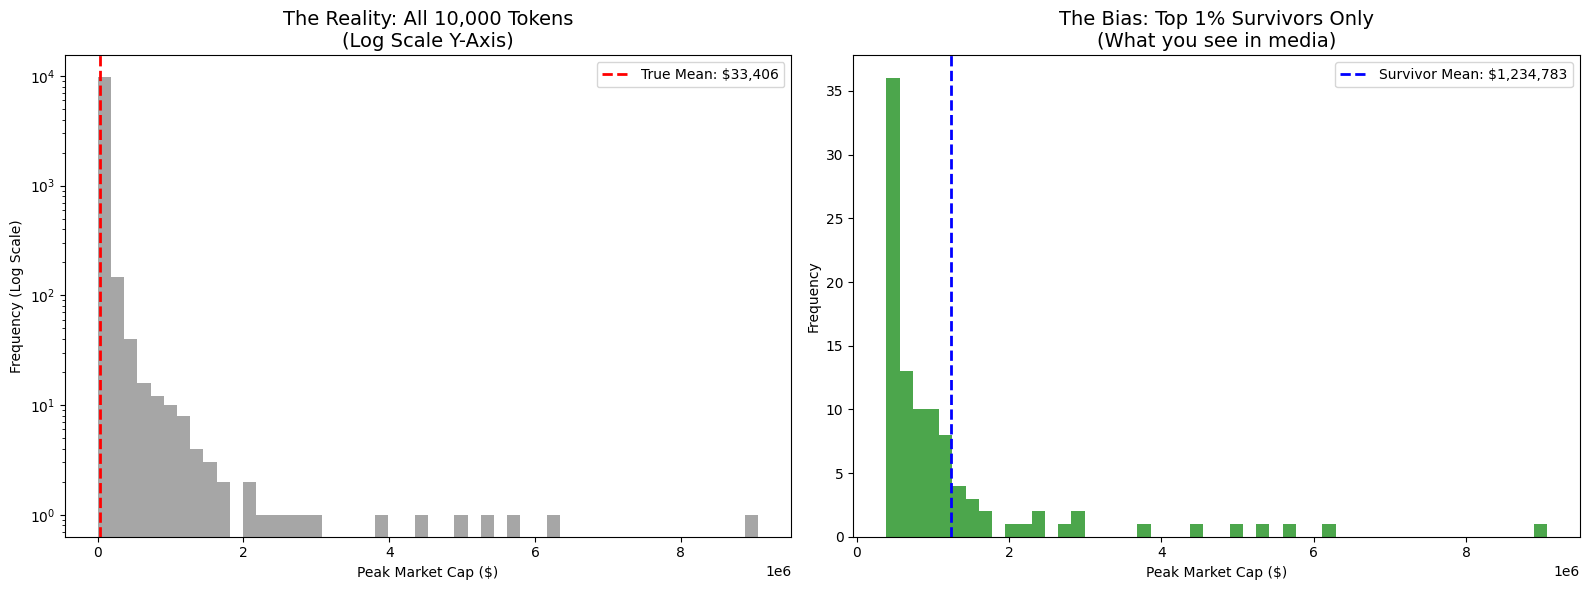

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (P)rep: Set up environment and reproducibility
np.random.seed(42)

def simulate_survivorship_bias(n_tokens=10000, alpha=1.2, scale=10000):
    """
    Simulates token launches using a Pareto Distribution to demonstrate Survivorship Bias.
    """
    # (R)equest: Generate 10,000 token launches
    # Using Pareto II (Lomax) distribution to simulate heavy tails (wealth distribution)
    # alpha=1.2 creates a very unequal distribution (80/20 rule on steroids)
    raw_values = np.random.pareto(alpha, n_tokens)
    market_caps = raw_values * scale
    
    # (I)terate: Create DataFrames for "The Graveyard" (All) and "Survivors" (Top 1%)
    df_all = pd.DataFrame(market_caps, columns=['Peak_Market_Cap'])
    
    # Define Survivors as the top 1% of tokens
    threshold = df_all['Peak_Market_Cap'].quantile(0.99)
    df_survivors = df_all[df_all['Peak_Market_Cap'] > threshold].copy()
    
    # (E)valuate: Calculate Means
    mean_all = df_all['Peak_Market_Cap'].mean()
    mean_survivors = df_survivors['Peak_Market_Cap'].mean()
    
    print(f"--- Survivorship Bias Audit ---")
    print(f"Total Tokens Launched: {n_tokens:,}")
    print(f"Survivor Threshold (Top 1%): ${threshold:,.2f}")
    print(f"True Mean Market Cap (The Graveyard): ${mean_all:,.2f}")
    print(f"Survivor Mean Market Cap (The Bias):  ${mean_survivors:,.2f}")
    print(f">> BIAS FACTOR: The survivor view is {mean_survivors / mean_all:.1f}x higher than reality.")
    
    return df_all, df_survivors, mean_all, mean_survivors

# Run the simulation
df_all, df_survivors, mean_all, mean_survivors = simulate_survivorship_bias()

# (M)echanism: Visualization using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: The Graveyard (All Tokens) - Log Scale Y-Axis
# We use log scale because otherwise the 99% of dead tokens make the survivors invisible.
axes[0].hist(df_all['Peak_Market_Cap'], bins=50, color='grey', alpha=0.7, log=True)
axes[0].set_title("The Reality: All 10,000 Tokens\n(Log Scale Y-Axis)", fontsize=14)
axes[0].set_xlabel("Peak Market Cap ($)")
axes[0].set_ylabel("Frequency (Log Scale)")
axes[0].axvline(mean_all, color='red', linestyle='dashed', linewidth=2, label=f'True Mean: ${mean_all:,.0f}')
axes[0].legend()

# Plot 2: The Survivors (Top 1%)
axes[1].hist(df_survivors['Peak_Market_Cap'], bins=50, color='green', alpha=0.7)
axes[1].set_title("The Bias: Top 1% Survivors Only\n(What you see in media)", fontsize=14)
axes[1].set_xlabel("Peak Market Cap ($)")
axes[1].set_ylabel("Frequency")
axes[1].axvline(mean_survivors, color='blue', linestyle='dashed', linewidth=2, label=f'Survivor Mean: ${mean_survivors:,.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()